Ecole Nationale des Ponts et Chaussees - MALAP 020

# Machine Learning Project 
 Roman CASTAGNE, Emile COHEN, Julia LINHART, Martin PIANA

## Importing the necessary libraries

In [2]:
#import necessary libraries 

import numpy as np
import pandas as pd
import os
import timeit
import math
import matplotlib.pyplot as plt

!pip install datawig
import datawig

from impyute.imputation.cs import fast_knn
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

## 1- Getting to know the Dataset

## 2 - Handling of missing data

### 2.1 -  Compensating for missing values using mean values ("fillna" method)  

Here is what the dataframe looks like at the beginning:

In [3]:
url = "data.csv"
health = pd.read_csv(url)
health.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The part below is a manipulation of the dataframe in order to keep it in a form in which meaning on the columns makes sense. We therefore wanted to have our dataframe to have countries as columns and Indicators and years as rows. 

In [4]:
# we get rid of the columns country Code and 'Indicator Code'
health=health.drop(['Country Code', 'Indicator Code'], 1)
# we redefine the columns and indexes
new_health=health.pivot(index='Indicator Name', columns="Country Name")
new_health=new_health.T
new_health=new_health.reset_index()
new_health=new_health.rename(index=str, columns={"level_0": "Year"})
new_health=new_health.pivot(index='Country Name', columns='Year')
new_health=new_health.T
new_health.head()

Country Name                                             Afghanistan  Albania  \
Indicator Name                                     Year                         
% of females ages 15-49 having comprehensive co... 1960          NaN      NaN   
                                                   1961          NaN      NaN   
                                                   1962          NaN      NaN   
                                                   1963          NaN      NaN   
                                                   1964          NaN      NaN   

Country Name                                             Algeria  \
Indicator Name                                     Year            
% of females ages 15-49 having comprehensive co... 1960      NaN   
                                                   1961      NaN   
                                                   1962      NaN   
                                                   1963      NaN   
                                                   1964      NaN   

Country Name                                             American Samoa  \
Indicator Name                                     Year                   
% of females ages 15-49 having comprehensive co... 1960             NaN   
                                                   1961             NaN   
                                                   1962             NaN   
                                                   1963             NaN   
                                                   1964             NaN   

Country Name                                             Andorra  Angola  \
Indicator Name                                     Year                    
% of females ages 15-49 having comprehensive co... 1960      NaN     NaN   
                                                   1961      NaN     NaN   
                                                   1962      NaN     NaN   
                                                   1963      NaN     NaN   
                                                   1964      NaN     NaN   

Country Name                                             Antigua and Barbuda  \
Indicator Name                                     Year                        
% of females ages 15-49 having comprehensive co... 1960                  NaN   
                                                   1961                  NaN   
                                                   1962                  NaN   
                                                   1963                  NaN   
                                                   1964                  NaN   

Country Name                                             Arab World  \
Indicator Name                                     Year               
% of females ages 15-49 having comprehensive co... 1960         NaN   
                                                   1961         NaN   
                                                   1962         NaN   
                                                   1963         NaN   
                                                   1964         NaN   

Country Name                                             Argentina  Armenia  \
Indicator Name                                     Year                       
% of females ages 15-49 having comprehensive co... 1960        NaN      NaN   
                                                   1961        NaN      NaN   
                                                   1962        NaN      NaN   
                                                   1963        NaN      NaN   
                                                   1964        NaN      NaN   

Country Name                                             ...  Uzbekistan  \
Indicator Name                                     Year  ...               
% of females ages 15-49 having comprehensive co... 1960  ...         NaN   
                                                   1961

The cell below is just here to show how the method is applied. Bits of this code that will be reused once or twice throughout the project.

In [5]:
#we compute the mean of each column
B = new_health.groupby(['Indicator Name']).mean()
# we fill all columns with their mean value
new_health = new_health.fillna(value = B )
#We then drop all columns for which this method makes no sense since the mean is a NaN
new_health = new_health.dropna(how='all')
#We therefore obtain a dataset with no NaN values
new_health.head(56)

Country Name                                             Afghanistan  \
Indicator Name                                     Year                
% of females ages 15-49 having comprehensive co... 1960          1.5   
                                                   1961          1.5   
                                                   1962          1.5   
                                                   1963          1.5   
                                                   1964          1.5   
                                                   1965          1.5   
                                                   1966          1.5   
                                                   1967          1.5   
                                                   1968          1.5   
                                                   1969          1.5   
                                                   1970          1.5   
                                                   1971          1.5   
                                                   1972          1.5   
                                                   1973          1.5   
                                                   1974          1.5   
                                                   1975          1.5   
                                                   1976          1.5   
                                                   1977          1.5   
                                                   1978          1.5   
                                                   1979          1.5   
                                                   1980          1.5   
                                                   1981          1.5   
                                                   1982          1.5   
                                                   1983          1.5   
                                                   1984          1.5   
                                                   1985          1.5   
                                                   1986          1.5   
                                                   1987          1.5   
                                                   1988          1.5   
                                                   1989          1.5   
                                                   1990          1.5   
                                                   1991          1.5   
                                                   1992          1.5   
                                                   1993          1.5   
                                                   1994          1.5   
                                                   1995          1.5   
                                                   1996          1.5   
                                                   1997          1.5   
                                                   1998          1.5   
                                                   1999          1.5   
                                                   2000          1.5   
                                                   2001          1.5   
                                                   2002          1.5   
                                                   2003          1.5   
                                                   2004          1.5   
                                                   2005          1.5   
                                                   2006          1.5   
                                                   2007          1.5   
                                                   2008          1.5   
                                                   2009          1.5   
                                                   2010          1.5   
                                                   2011          1.5   
                                                   2012          1.5   
                                        

### 2.2 -  Replacing missing values using K-Nearest Neighbours  

In the cell below we fill in the missing values by KNN. We consider that the columns containingthe values for a given indicator for all the countries as a vector

In [6]:
#on importe le dataframe et on élimine les 2 colonnes qui ne nous servent à rien

url = "data.csv"
health = pd.read_csv(url)
health_KNN=health.drop(['Country Code', 'Indicator Code'], 1)

#je réarrange le format du dataframe pour avoir les nom des pays en index et des colonnes avec les indicateurs
health_KNN=health_KNN.pivot(index="Country Name", columns='Indicator Name')


#je sélectionne que l'année qui m'intéresse ie ici 2015
health_KNN_2015=health_KNN["2015"]
#je me débrasse des indicateurs ou les valeurs sont NaN pour tous les pays
health_KNN_2015=health_KNN_2015.dropna(axis=1, how='all')

#je crée des listes avec les noms des pays et des indicateurs pour pouvoir présebter un résultat propre à la fin
countries=[0]*health_KNN_2015.shape[0]
countries[:]=health_KNN_2015.index[:]
Indicator_name=[0]*health_KNN_2015.shape[1]
Indicator_name[:]=health_KNN_2015.columns[:]

#j'effectue un remplissage de valeurs manquantes par KNN en considérant la colonne contenant 
#les valeurs pour un même indice mais pour tous les pays comme un vecteur
health_KNN_2015=fast_knn(health_KNN_2015, k=2)
health_KNN_2015.index=countries
health_KNN_2015.columns=Indicator_name
health_KNN_2015.head()

/anaconda3/lib/python3.6/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old",...,"School enrollment, tertiary, female (% gross)","Specialist surgical workforce (per 100,000 population)",Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant),Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of insecticide-treated bed nets (% of under-5 population),Women's share of population ages 15+ living with HIV (%)
Afghanistan,27.55,29.975,500.000000,39.85,6900.000000,1000.000000,6700.000000,1000.000000,86.954464,4.616073,...,22.54509,41.149773,24.1,8685568.0,26.703,4.392152,28.825,30.8,49.2,28.575694
Albania,27.55,29.975,19574.074074,39.85,634082.407407,35549.074074,600691.666667,32378.703704,44.806973,17.950766,...,22.54509,41.149773,24.1,1658584.0,57.407,1.598580,28.825,30.8,49.2,43.454334
Algeria,27.55,29.975,200.000000,39.85,8800.000000,500.000000,8600.000000,500.000000,52.617579,9.062490,...,22.54509,41.149773,24.1,28054939.0,70.727,2.712200,28.825,30.8,49.2,45.725948
American Samoa,27.55,29.975,19574.074074,39.85,634082.407407,35549.074074,600691.666667,32378.703704,58.602209,12.876196,...,22.54509,41.149773,24.1,48430.0,87.202,0.115698,28.825,30.8,49.2,43.454334
Andorra,27.55,29.975,19574.074074,39.85,634082.407407,35549.074074,600691.666667,32378.703704,58.602209,12.876196,...,22.54509,41.149773,24.1,59983.0,85.115,-3.836562,28.825,30.8,49.2,43.454334


This time in the cell beneath we consider the problem the other way around: we consider the vectors as vectors of size 345 containing all the values of the indicators for one given country. In other words a vector represents a country.

In [7]:
#Ici on fait le même travail mais en regardant le problème sous un autre angle
#On explique plus en détail 4 lignes plus bas
health_KNN_2015_v2=health_KNN["2015"]
health_KNN_2015_v2.head

Indicator_name_v2=[0]*health_KNN_2015_v2.shape[1]
Indicator_name_v2[:]=health_KNN_2015_v2.columns[:]



health_KNN_2015_v2=health_KNN_2015_v2.T
health_KNN_2015_v2=health_KNN_2015_v2.dropna(axis=1, how='all')
health_KNN_2015_v2=fast_knn(health_KNN_2015_v2, k=1)




health_KNN_2015_v2.columns=countries
health_KNN_2015_v2.index=Indicator_name_v2
health_KNN_2015_v2.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),1.074900e+06,95665.752016,1.228487e+06,6568.622395,4307.574216,817555.835954,3459.730425,2.276211e+07,1.342809e+06,94498.54262,...,984139.681329,9490.298491,969845.033908,2.858808e+06,4121.747077,159569.620209,3.900246e+08,925325.050598,564890.693651,534013.992672
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),1.074900e+06,95665.752016,1.228487e+06,6568.622395,4307.574216,817555.835954,3459.730425,2.276211e+07,1.342809e+06,94498.54262,...,984139.681329,9490.298491,969845.033908,2.858808e+06,4121.747077,159569.620209,3.900246e+08,925325.050598,564890.693651,534013.992672
AIDS estimated deaths (UNAIDS estimates),5.000000e+02,95665.752016,2.000000e+02,6568.622395,4307.574216,12000.000000,3459.730425,2.276211e+07,2.300000e+03,200.00000,...,2600.000000,9490.298491,3300.000000,8.900000e+03,4121.747077,159569.620209,1.100000e+06,500.000000,20000.000000,29000.000000
ARI treatment (% of children under 5 taken to a health provider),1.074900e+06,95665.752016,1.228487e+06,6568.622395,4307.574216,817555.835954,3459.730425,2.276211e+07,1.342809e+06,94498.54262,...,984139.681329,9490.298491,969845.033908,2.858808e+06,4121.747077,159569.620209,3.900246e+08,925325.050598,564890.693651,534013.992672
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.074900e+06,95665.752016,1.228487e+06,6568.622395,4307.574216,817555.835954,3459.730425,2.276211e+07,1.342809e+06,94498.54262,...,984139.681329,9490.298491,969845.033908,2.858808e+06,4121.747077,159569.620209,3.900246e+08,925325.050598,564890.693651,534013.992672


### 2.3 -  The clean dataset :  a combination of ”dropna”, K-NNs and Deep Learning 

### 2.3.1 - Fonction definition 

The function *Impute_values* implemented above, imputes the missing values for an ”incomplete column”, basedon a list of input columns, from a given dataframe, using the *SImpleImputer* method from the *DataWig* library. It doesn't return anything, only changes the input dataframe.

In [0]:
def Impute_values(dataframe, train_columns, column_to_complete):
  
  #Split dataset into train and test samples 
  df_train, df_test = datawig.utils.random_split(dataframe)

  #Initialize a SimpleImputer model
  imputer = datawig.SimpleImputer(
      input_columns=train_columns, # column(s) containing information about the column we want to impute
      output_column=column_to_complete , # the column we'd like to impute values for
      output_path = 'imputer_model' # stores model data and metrics
      )

  #Fit an imputer model on the train data
  imputer.fit(train_df=df_train, num_epochs=50)

  #Impute missing values and return original dataframe plus the predictions column
  imputed = imputer.predict(dataframe)

  #replace the column_to_complete in the original dataframe with the the predictions from imputed
  dataframe[column_to_complete]=imputed.iloc[:,-1]

 The following function *clean_data* includes the following steps : rearrange the original dataset, create the input data using K-NNs, impute missing values unsing Deep Learning. It returns the original sub-dataframe of a given year with the imputed misssing values.

In [0]:
def clean_data(dataframe,year):
  
  !pip install impyute
  from impyute.imputation.cs import fast_knn
  
  
  #----------------- rearrange the original dataframe  -----------------------------

  #remove unnecessary columns
  dataframe=dataframe.drop(['Country Code', 'Indicator Code'], 1)

  #rearrange indexes
  dataframe=dataframe.pivot(index="Country Name", columns='Indicator Name')
  
  #extract the sub-dataframe for the wanted year 
  df_year=dataframe[str(year)]
  
  #we remove all the columns where at least half of the data is missing
  df_year=df_year.dropna(axis=1, thresh=0.5*258)
  
  #---------------- building the input indicators ---------------------------------
  
  
  ## we extract the indicator names 
  Indicator_name=[0]*df_year.shape[1]
  Indicator_name[:]=df_year.columns[:]
  
  ## we build our input indicators with only the ones where less than 20% of the values are missing
  Input_indicators=[]
  for i in Indicator_name :
    if (df_year[i].isnull().sum()<0.2*186): # 186 represents the numbers of countries
      Input_indicators.append(i)
      
  ## we replace the missing values of the input indicators using the knn-method
  
  #extract the columns we want to impute the values of
  data_knn=df_year[Input_indicators]
  #extracting country names 
  countries=[0]*data_knn.shape[0]
  countries[:]=data_knn.index[:]
  #applying knn-method
  data_knn=fast_knn(data_knn,k=1)
  #put the right index names on the knn-data and replace the missing values in the original dataframe
  data_knn.index=countries
  data_knn.columns=Input_indicators
  df_year[Input_indicators]=data_knn
  
  #--------- datawig for imputing missing values on the rest of the columns ---------------------------
  
  #build a list with all the column names with missing values
  Incomplet_indicators=[]
  for i in Indicator_name:
    if i not in Input_indicators:
      Incomplet_indicators.append(i)
  
  #we drop the column that causes problems in the Impute_values function below
  if str(year)=='2015':
    to_remove=Incomplet_indicators[52]
  else : 
    to_remove='Health expenditure, total (current US$)'
  df_year=df_year.drop(to_remove,1)
  #removing the corresponding indicator name
  Incomplet_indicators.remove(to_remove)
      
  #imputing values and building a clean dataset
  for i in Incomplet_indicators :
    Impute_values(df_year,Input_indicators,i)
  
  return(df_year)

### 2.3.2 - Example on 2015

In [0]:
#import dataset as dataframe 
url='data.csv'
df = pd.read_csv(url)

In [0]:
#on applique les fonctions 
clean_data_2015=clean_data(df,2015)

In [0]:
#verification
print(clean_data_2015.isnull().sum().sum())

0


We just verified that the ouput dataframe has no missing values.  It is now a clean, sparse and meaningful dataframe that can be used for several Machine Learning prediction methods. 

This example will later on be used on other years such as 2014, 2012, 2010 or 2000.

## 3 - Predictions

### 3.1 - Clustering

For the clustering methods, we'll just use a mean imputation based on the year 2015. We delete all columns containing only NaN values and we organise our table in order to have features as columns and countries as rows.

In [0]:
Label = pd.read_excel('2018_Statistical_Annex_Table_2.xlsx', sheet_name='data')

health_2015 = df.drop(['Country Code', 'Indicator Code'], 1)
health_2015 = health_2015[['Country Name','Indicator Name','2015']]
health_2015 = health_2015.pivot(index='Country Name', columns="Indicator Name")
health_2015 = health_2015.dropna(1,'all')
health_2015 = health_2015.fillna(health_2015.mean())
health_2015 = health_2015[health_2015.index.isin(Label['Country Name'])].dropna() # Cette ligne permet de ne garder que les pays présents dans la table donnant les IDH

scaler = MinMaxScaler(feature_range=[0, 1])
health_2015[health_2015.columns] = scaler.fit_transform(health_2015[health_2015.columns])
health_2015.head(5)

2015  ...                                                         
Indicator Name % of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)  ... Women's share of population ages 15+ living with HIV (%)
Country Name                                                                                                                          ...                                                         
Afghanistan                                              0.297321                                                                     ...                                           0.389572      
Albania                                                  0.297321                                                                     ...                                           0.625049      
Algeria                                                  0.297321                                                                     ...                                           0.661001      
Andorra                                                  0.297321                                                                     ...                                           0.625049      
Angola                                                   0.297321                                                                     ...                                           0.882306      

[5 rows x 254 columns]

### 3.1.3 - Principal Components Analysis

We can now apply a PCA to our data and see what percentages of variance are contained in a number of components.

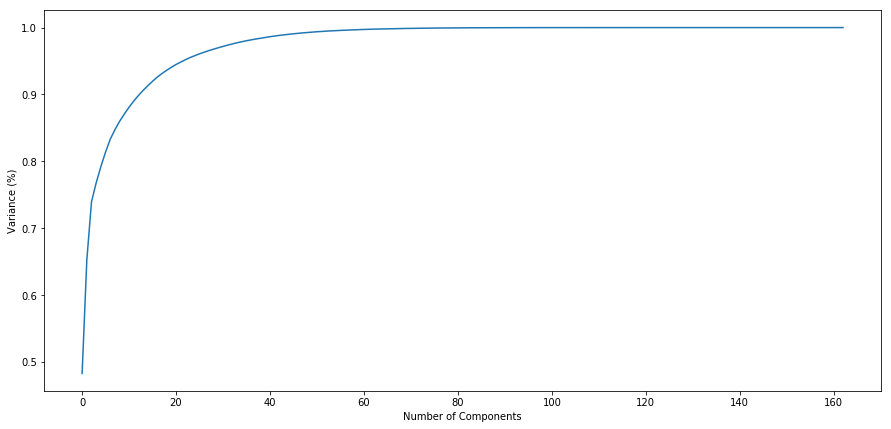

In [0]:
pca = PCA().fit(health_2015)

plt.figure(figsize=(15,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

We will now try clustering methods on data with reduced dimension in order to understand better these algorithms. We first try the K-Means algorithm and store the obtained labels on a new dataframe.

Score du clustering K-Means après PCA:  0.37550434217058953


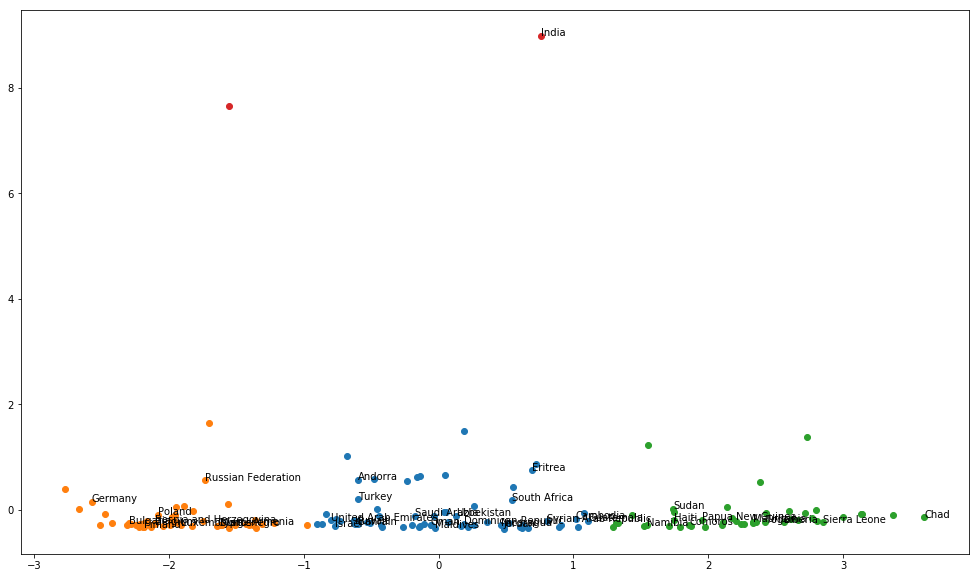

In [0]:
n_comp = 2
health_2015_pca_array = PCA(n_components=n_comp).fit_transform(health_2015) # We apply the PCA
health_2015_pca = pd.DataFrame(data = health_2015_pca_array, columns = ['comp_{}'.format(i+1) for i in range(n_comp)]) # Then put the columns in a dataframe
health_2015_pca = health_2015_pca.set_index(health_2015.index.values) # And give country name as index

kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(health_2015_pca) # Apply K-Means clustering

health_labels_2015 = pd.DataFrame(index=health_2015.index) # Creation of a new database to merge with the one with the ground truth labels
health_labels_2015['kmeans_labels'] = kmeans_pca.labels_+1
label_countries = pd.merge(health_labels_2015, Label, on = 'Country Name', left_index=True)

print("Score of K-Means clustering after PCA: ", adjusted_rand_score(label_countries['kmeans_labels'], label_countries['Label']))


plt.figure(figsize=(17,10))
for l in range(4):
  plt.scatter(health_2015_pca_array[kmeans_pca.labels_==l,0],health_2015_pca_array[kmeans_pca.labels_==l,1])

for i, txt in enumerate(label_countries['Country Name']):
  if i%4 == 3:
    plt.annotate(txt, (health_2015_pca_array[i,0], health_2015_pca_array[i,1]))
plt.show()

### 3.1.4 - DBSCAN

Now we will do the same for a clustering using DBSCAN.

Score of DBSCAN clustering after PCA:  0.3195669269918836


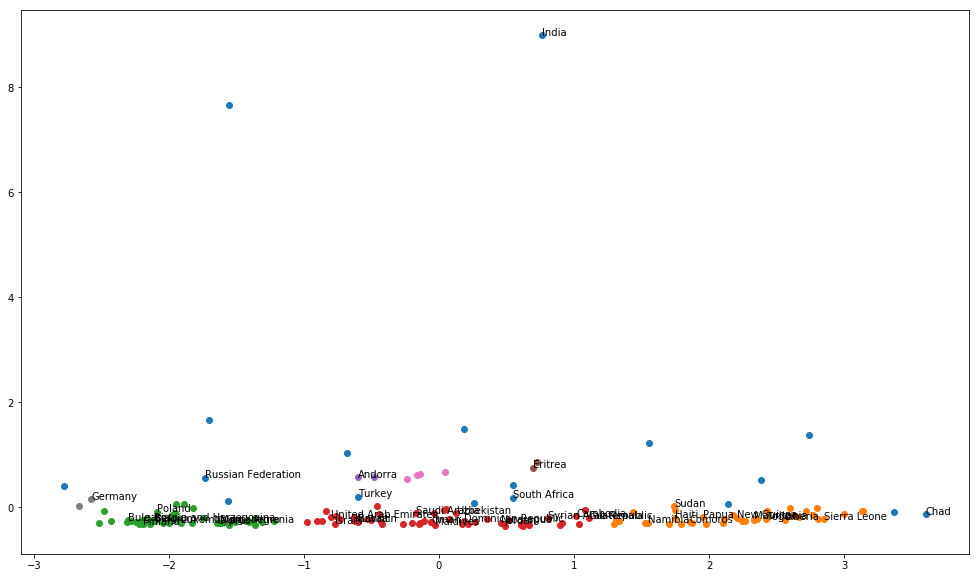

In [0]:
db_pca = DBSCAN(eps=0.2, min_samples=2)
db_pca.fit(health_2015_pca) # Apply DBSCAN clustering

label_countries['DBSCAN_labels'] = db_pca.labels_

print("Score of DBSCAN clustering after PCA: ", adjusted_rand_score(label_countries['DBSCAN_labels'], label_countries['Label']))

plt.figure(figsize=(17,10))
for l in range(-1,max(db_pca.labels_)+1):
  plt.scatter(health_2015_pca_array[db_pca.labels_==l,0],health_2015_pca_array[db_pca.labels_==l,1])

for i, txt in enumerate(label_countries['Country Name']):
  if i%4 == 3:
    plt.annotate(txt, (health_2015_pca_array[i,0], health_2015_pca_array[i,1]))
plt.show()

### 3.2 - Classification :  AdaBoost 

### 3.2.1 - Organizing the dataset

Thanks to 3.3 we are able to have clean datasets for each year, in this part we load the csv files and concatenate them to have a bigger train set. We also add the labels. 

In [8]:
health2000 = pd.read_csv("health_2000.csv")
health2010 = pd.read_csv("health_2010.csv")
health2012 = pd.read_csv("health_2012.csv")
health2014 = pd.read_csv("health_2014.csv")
health2015 = pd.read_csv("health_2015.csv")
label= pd.read_excel('2018_Statistical_Annex_Table_2.xlsx',sheet_name ='Sheet1' )

#We build our labelized datasets for each year
health_2000 = pd.merge(health2000, label.loc[:,['Country Name',2000]], on = 'Country Name')
health_2000.rename(columns={2000:'label'}, inplace=True)

health_2010 = pd.merge(health2010, label.loc[:,['Country Name',2010]], on = 'Country Name')
health_2010.rename(columns={2010:'label'}, inplace=True)

health_2012 = pd.merge(health2012, label.loc[:,['Country Name',2012]], on = 'Country Name')
health_2012.rename(columns={2012:'label'}, inplace=True)

health_2014 = pd.merge(health2014, label.loc[:,['Country Name',2014]], on = 'Country Name')
health_2014.rename(columns={2014:'label'}, inplace=True)

health_2014 = pd.merge(health2014, label.loc[:,['Country Name',2014]], on = 'Country Name')
health_2014.rename(columns={2014:'label'}, inplace=True)

health_2015 = pd.merge(health2015, label.loc[:,['Country Name',2015]], on = 'Country Name')
health_2015.rename(columns={2015:'label'}, inplace=True)

# Before concatenating we have to delete the columns that are not in every dataset
columns = list(health_2000.columns)
for column in columns : 
    if (column not in list(health_2010.columns)) or (column not in list(health_2012.columns)) or (column not in list(health_2014.columns)) or (column not in list(health_2015.columns)) :
        columns.remove(column)   
for column in columns : 
    if (column not in list(health_2000.columns)) or (column not in list(health_2012.columns)) or (column not in list(health_2014.columns)) or (column not in list(health_2015.columns)):
        columns.remove(column)  
for column in columns : 
    if (column not in list(health_2010.columns)) or (column not in list(health_2000.columns)) or (column not in list(health_2014.columns)) or (column not in list(health_2015.columns)): 
        columns.remove(column)  
for column in columns : 
    if (column not in list(health_2010.columns)) or (column not in list(health_2012.columns)) or (column not in list(health_2000.columns)) or (column not in list(health_2015.columns)): 
        columns.remove(column)  
        

for to_remove in list(health_2000.columns)  : 
    if to_remove not in columns : health_2000=health_2000.drop(to_remove,1)
for to_remove in list(health_2010.columns)  : 
    if to_remove not in columns : health_2010=health_2010.drop(to_remove,1)
for to_remove in list(health_2012.columns)  : 
    if to_remove not in columns : health_2012=health_2012.drop(to_remove,1)
for to_remove in list(health_2014.columns)  : 
    if to_remove not in columns : health_2014=health_2014.drop(to_remove,1)
for to_remove in list(health_2015.columns)  : 
    if to_remove not in columns : health_2015=health_2015.drop(to_remove,1)

# We concatenate them 
# Here we have a clean dataset with all labels, ready to train our classifier
health_ada = pd.concat([health_2000,health_2010,health_2012,health_2014],axis = 0,sort = True)

# little adjustment
health_ada=health_ada.drop('Survival to age 65, female (% of cohort)',1)

FileNotFoundError: [Errno 2] No such file or directory: '2018_Statistical_Annex_Table_2.xlsx'

### 3.2.2 - Calibration of the AdaBoostClassifier

The two important parameters that we choose to tune are the number of weak estimators and the learning rate. For this we plotted the accuracy score for diffenrent learning_rate and n_estimators. We imported some modules from Scikit-Learn to use the AdaBoostClassifier.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

X = health_ada.drop(['label','Country Name'], axis = 1).values
y = health_ada.loc[:,'label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Testing for different learning rate and for different number of weak estimators
#n_estimators = 200
learning_rate = [0.1,0.5,0.8,2,3,6]
plt.figure(figsize=(25,15))

for j in learning_rate :
    abc = AdaBoostClassifier(n_estimators = 200,learning_rate=j)
    abc.fit(X_train, y_train)
    estimators_num=len(abc.estimators_)
    A=range(1,estimators_num+1)
    plt.plot(list(A),list(abc.staged_score(X_test,y_test)),label="Testing score, learning rate ="+" " +str(j))

plt.xlabel("estimator num")
plt.ylabel("score")        
plt.legend(loc='best', fancybox=True)
plt.show()

At this step, we were able to choose the parameters to have the highest accuracy score. We chose :
```
n_estimators = 160
learning_rate = 2
```



### 3.2.3 - AdaBoost classification

In [0]:
adab = AdaBoostClassifier(n_estimators=160,learning_rate=2)
# Train Adaboost Classifer
model = adab.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Accuracy of the model 
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Our accuracy is over 70%.
We chose to apply our model to 2015, we plotted the confusion matrix allowing us to analyse the FN and FP.

In [0]:
# Testing our classifier on year 2015
import seaborn as sns

X_2015  = health_2015.drop(['label','Country Name'], axis = 1).values
y_2015 = health_2015.loc[:,'label'].values

y = model.predict(X_2015)

class_names = [1,2,3,4]
fig, ax = plt.subplots(figsize = (15,15))
tick_marks = np.arange(4)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(metrics.confusion_matrix(y, y_2015), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix : AdaBoostClassifier', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

To end the analysis, we decided to visually represent our classification thanks to a PCA. We plotted the PCA respectively with predicted labels and actual labels.

In [0]:
# Representation after a PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

new_X_2015 = StandardScaler().fit_transform(X_2015)
pca_2015 = PCA(n_components = 2).fit_transform(new_X_2015)

colormap=np.array(['','blue','orange','green','black'])
countries = label.loc[:,'Country Name'].values

#Classification from AdaBoost
plt.figure(figsize=(25,15))
plt.scatter(pca_2015[:,1],pca_2015[:,0],c=colormap[y])
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(countries[:163]):
    if i%5 ==  1:
        plt.annotate(txt, (pca_2015[i,1], pca_2015[i,0]))
plt.show()

#Actual clusters from the labels
plt.figure(figsize=(25,15))
plt.scatter(pca_2015[:,1],pca_2015[:,0],c=colormap[y_2015])
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(countries[:163]):
    if i%5 == 1 :
        plt.annotate(txt, (pca_2015[i,1], pca_2015[i,0]))        
plt.show()